In [592]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.init as I
from torch.nn import Sigmoid
from torch.autograd import Variable

class RBM(nn.Module):

    def __init__(self,
                 visible_size,
                 hidden_size):
        super(RBM, self).__init__()
        self.input_layer = visible_size
        self.output_layer = hidden_size
        
        self.feed = nn.Linear(visible_size, hidden_size,bias=False)  

    def forward(self, x):
        h = Sigmoid()(self.feed(x))        # x -> h 

        x_reconstructed = torch.matmul(h,self.feed.weight)
        
        h_reconstructed = Sigmoid()(self.feed(x_reconstructed))# h-> x'

        return h,x_reconstructed,h_reconstructed





In [593]:
data = torch.rand(5210,257)
model = RBM(257, 200)
model.feed.weight.requires_grad = True

In [594]:
h,x_reconstructed,h_reconstructed  = model(data)

In [595]:
x_reconstructed

tensor([[ 0.2881,  0.1064, -0.1993,  ...,  0.0922, -0.2387, -0.3539],
        [ 0.2760,  0.1417, -0.2506,  ...,  0.0550, -0.2183, -0.3120],
        [ 0.3319,  0.1227, -0.2421,  ...,  0.0805, -0.2724, -0.3956],
        ...,
        [ 0.3138,  0.1208, -0.2207,  ...,  0.0855, -0.2471, -0.3954],
        [ 0.3058,  0.0998, -0.2125,  ...,  0.0690, -0.2256, -0.3563],
        [ 0.2564,  0.0827, -0.2119,  ...,  0.0459, -0.2178, -0.3635]],
       grad_fn=<MmBackward>)

In [596]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=lr)


## Training

In [597]:
data = MinMaxScaler().fit_transform(data).astype("float32")

In [598]:
trainloader = torch.utils.data.DataLoader(data,batch_size=64)

In [ ]:
losses = []
#model = RBM(257, 200)

for epoch in range(200):  # loop over the dataset multiple times

    running_loss = 0.0
    for i,data in enumerate(trainloader):


        model.zero_grad()     ## faire en sorte que les gradients ne s'accumulent pas

        h,x_reconstructed,h_reconstructed = model(data)     ##  calcul x_reconstructed


        a = model.feed.weight.t()       ## W model


        loss = -torch.sum(a*(torch.matmul(data.t(),h) - torch.matmul(x_reconstructed.t(),h_reconstructed)))/(data.shape[0]*data.shape[1])
                ## W* (xh_t - x'_t.  h'_t)
        loss = torch.nn.KLDivLoss(reduction='mean')(data,x_reconstructed)
        loss.backward()     ## (xh_t - x'_t. h'_t)

        optimizer.step()    ## W -= W - lr*dL/dW
        # print statistics
        running_loss += loss.item()

    losses.append(loss)
    #print(criterion(data,x_reconstructed))
    print(loss)
print('Finished Training')

In [517]:
a = model.feed.weight.t()
loss = torch.sum(a*(torch.matmul(torch.from_numpy(data).t(),h) - torch.matmul(x_reconstructed.t(),h_reconstructed)))
loss.backward()

In [490]:
b = torch.matmul(data.t(),h) - torch.matmul(x_reconstructed.t(),h_reconstructed)

In [491]:
a = model.feed.weight
a.shape , b.shape

(torch.Size([200, 257]), torch.Size([257, 200]))

In [478]:
h,x_reconstructed,h_reconstructed = model(data)


In [ ]:
import time

n_epoch = 200
print(len(trainloader))
criterion = nn.MSELoss()
learning_rate = 0.001
start = time.time()
n_samples = len(trainloader)
grad_norm_epoch = [0 for i in range(n_epoch)]
full_loss_epoch = [0 for i in range(n_epoch)]

for epoch in range(n_epoch):  # loop over the dataset multiple times
    #Compute full gradient and full loss function
    running_loss = 0.0
    optimizer.zero_grad()
    for i, data in enumerate(trainloader):
      h,x_reconstructed,h_reconstructed = model(data)

      loss_grad = criterion(x_reconstructed, data)
      loss_grad.backward() # compute gradients

      for f in model.parameters():
        w_u = Variable(torch.matmul(data.t(),h) - torch.matmul(x_reconstructed.t(),h_reconstructed)).t()
        f.data.sub_(w_u * learning_rate)
    print(loss)
        # print statistics


end = time.time()
print('time is : ', end - start)
print('Finished Training')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd84da230d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd84da230d0>)

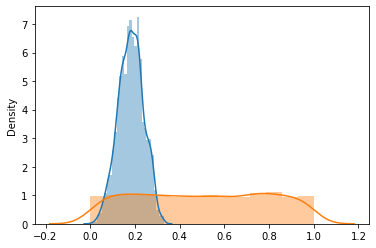

In [526]:
import seaborn as sns
x_recons = x_reconstructed.detach().numpy()
sns.distplot(x_recons) ,sns.distplot(data)